# Import Library

Library yang dibutuhkan antara lain pandas, numpy, matplotlib, dan matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import folium

# Import Data

## Mengambil dan Membaca Data

In [2]:
# Mengambil
df = pd.read_csv('london_crime_by_lsoa.csv')

Pada Assignment 1 ini kita mengambil data dari link "https://www.kaggle.com/datasets/jboysen/london-crime" yang berjudul London Crime Data, 2008-2016

In [3]:
# Membaca Data
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## Melihat Jumlah data dan Kolom

In [4]:
df.shape

(13490604, 7)

Data ini berisi 13490604 baris dan 7 kolom

# Mengetahui Informasi Data

## Menampilkan Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Dari data di atas terdapat 2 type data yaitu object(yang biasanya bertipe string) dan int64(integer)


object: lsoa_code, borough, major_category, minor_category


integer: value, year, month

* lsoa_code: ini mewakili area kepolisian
* borough: borough london yang terkait dengan statistik
* major_category: kategori kejahatan utama
* minor_category: kategori kejahatan ringan
* value: jumlah kejahatan untuk wilayah tertentu, pada bulan tertentu
* year: tahun ringkasan statistik
* month: bulan statistik ringkasan

In [6]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Dari data tersebut dapat dilihat ternyata terdapat nilai 0 pada kolom value yang dimana apakah data tersebut benar bernilai 0 atau memang terdapat kesalahan dalam pengisian data. Sehingga saya memutuskan untuk hanya menampilkan record/baris yang memiliki value 1.

In [7]:
df_not_null = df[df["value"] == 1]
df_not_null

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [8]:
df_not_null.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5


Data di atas adalah tampilan **5 baris data teratas**

In [9]:
df_not_null.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6


Data di atas adalah tampilan **5 baris data terbawah**

In [10]:
df_not_null.describe()

,value,year,month
count,2141789.0,2.141789e+06,2.141789e+06
mean,1.0,2.012015e+03,6.507797e+00
std,0.0,2.599081e+00,3.425987e+00
min,1.0,2.008000e+03,1.000000e+00
25%,1.0,2.010000e+03,4.000000e+00
50%,1.0,2.012000e+03,7.000000e+00
75%,1.0,2.014000e+03,9.000000e+00
max,1.0,2.016000e+03,1.200000e+01


data di atas merupakan tampilan deskriptif statistik data antara lain:
* count
* mean
* std
* min
* 25%
* 50%
* 75%
* max

In [11]:
df_not_null.describe(include="O")

,lsoa_code,borough,major_category,minor_category
count,2141789,2141789,2141789,2141789
unique,4835,33,9,32
top,E01001439,Croydon,Theft and Handling,Burglary in a Dwelling
freq,709,94786,662379,154845


# Data Cleansing

## Checking for Missing Value

In [12]:
df_not_null.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Data di datas adalah pengecekan missing value, dalam kasus ini **tidak ada**

## Checking for Duplicated Data

In [13]:
df_not_null.duplicated().sum()

0

Data di datas adalah pengecekan duplicate data, dalam kasus ini **tidak ada**

In [14]:
df_not_null

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


# Data Exploration

In [15]:
df_not_null['borough'].value_counts()

Croydon                   94786
Lambeth                   92277
Ealing                    87985
Southwark                 85661
Barnet                    83693
Newham                    82695
Lewisham                  81911
Brent                     80637
Enfield                   77162
Wandsworth                77134
Bromley                   73163
Waltham Forest            71396
Tower Hamlets             71257
Hackney                   71207
Haringey                  70662
Hillingdon                68604
Redbridge                 67682
Greenwich                 66340
Hounslow                  66061
Islington                 65069
Camden                    63721
Westminster               57206
Hammersmith and Fulham    55175
Havering                  55102
Barking and Dagenham      54501
Bexley                    51715
Harrow                    50786
Merton                    50453
Kensington and Chelsea    47735
Sutton                    43870
Richmond upon Thames      42952
Kingston

In [16]:
df_not_null['major_category'].value_counts()

Theft and Handling             662379
Violence Against the Person    544226
Criminal Damage                353769
Burglary                       263035
Drugs                          138878
Robbery                        110785
Other Notifiable Offences       65925
Fraud or Forgery                 1835
Sexual Offences                   957
Name: major_category, dtype: int64

In [17]:
df_not_null['minor_category'].value_counts()

Burglary in a Dwelling                    154845
Theft From Motor Vehicle                  151633
Assault with Injury                       138647
Other Theft                               136743
Common Assault                            135116
Harassment                                135016
Criminal Damage To Motor Vehicle          124756
Theft/Taking Of Motor Vehicle             122568
Possession Of Drugs                       112104
Burglary in Other Buildings               108190
Criminal Damage To Dwelling                96217
Personal Property                          92874
Other Criminal Damage                      88923
Other Theft Person                         77223
Theft/Taking of Pedal Cycle                72838
Wounding/GBH                               68261
Other Notifiable                           61176
Theft From Shops                           45207
Criminal Damage To Other Building          43873
Motor Vehicle Interference & Tampering     42866
Other violence      

In [18]:
df_not_null['year'].value_counts()

2016    246170
2015    241347
2008    240966
2009    238097
2014    237515
2010    235513
2011    234747
2012    234714
2013    232720
Name: year, dtype: int64

In [19]:
df_not_null['month'].value_counts()

7     183417
5     182511
6     182374
10    182276
3     179212
9     178645
11    178348
8     178316
4     178181
1     174978
2     171902
12    171629
Name: month, dtype: int64

**Keterangan**
Dari hasil exploring data di atas dapat diambil informasi sebagai berikut:
* Pada kolom <b>borough</b>, kejahatan terendah berada di "City of London" dan tingkat kejahatan tertinggi berada di "Lambeth"
* Pada kolom <b>major_category</b> jenis kategori utama kejahatan terendah merupakan kejahatan "Sexual Offences" dan yang tertinggi merupakan kejahatan "Theft and Handling"
* Pada kolom <b>minor_category</b> jenis kategori minor kejahatan terendah merupakan kejahatan "Rape" dan headline kejatahan tertinggi merupakan kejahatan "Other Theft"
* Pada kolom <b>year</b>, kejahatan tertinggi berada di tahun 2016 dan kejahatan terendah berada di 2013
* Pada kolom <b>Month</b>, kejahatan tertinggi berada di bulan ke - 7 (Juli) dan kejahatan terendah berada di bulan ke - 2 (Februari)

# Data Visualization

**Hipotesis**
1. Bagaimana rangking 5 teratas wialyah dengan tindak kejahatan tertinggi pada kurun waktu tahun 2008-2016?
2. Rata-rata jenis kejahatan utama(major) yang terjadi periode 2008-2016?
3. Perbandingan antara Robbery dan Drugs di London Tahun 2008 - 2016?

## Bagaimana rangking 5 teratas wilayah dengan tindak kejahatan tertinggi pada kurun waktu tahun 2008-2016 dan julmah tindak kejahatannya?

In [20]:
df = df_not_null
df

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [21]:
df['borough'].value_counts().head(5)

Croydon      94786
Lambeth      92277
Ealing       87985
Southwark    85661
Barnet       83693
Name: borough, dtype: int64

In [22]:
bor = df.groupby(['borough', 'year'])['value'].sum()
bor

borough               year
Barking and Dagenham  2008    6087
                      2009    6153
                      2010    6073
                      2011    5946
                      2012    5857
                              ... 
Westminster           2012    6479
                      2013    6472
                      2014    6883
                      2015    6835
                      2016    6899
Name: value, Length: 294, dtype: int64

In [23]:
Cro = bor['Barking and Dagenham']
Cro

year
2008    6087
2009    6153
2010    6073
2011    5946
2012    5857
2013    5994
2014    6085
2015    6028
2016    6278
Name: value, dtype: int64

In [24]:
Bar = bor['Barnet']
Bar

year
2008    9349
2009    9486
2010    9259
2011    9246
2012    8776
2013    8989
2014    9291
2015    9620
2016    9677
Name: value, dtype: int64

In [25]:
Eal = bor['Ealing']
Eal 

year
2008     9889
2009     9962
2010    10203
2011     9852
2012     9815
2013     9394
2014     9449
2015     9514
2016     9907
Name: value, dtype: int64

In [26]:
Bro = bor['Bromley']
Bro

year
2008    8800
2009    8506
2010    7904
2011    8205
2012    7869
2013    7821
2014    7891
2015    8072
2016    8095
Name: value, dtype: int64

In [27]:
Lam = bor['Lambeth']
Lam

year
2008    10473
2009    10268
2010    10213
2011    10152
2012     9946
2013     9927
2014    10257
2015    10397
2016    10644
Name: value, dtype: int64

In [28]:
Cro.to_frame()

,value
year,
2008,6087
2009,6153
2010,6073
2011,5946
2012,5857
2013,5994
2014,6085
2015,6028
2016,6278


In [29]:
dfCro = Cro.to_frame()
dfCro.rename(columns={'value':'Croydon'}, inplace=True)
dfCro

,Croydon
year,
2008,6087
2009,6153
2010,6073
2011,5946
2012,5857
2013,5994
2014,6085
2015,6028
2016,6278


In [30]:
dfBar = Bar.to_frame()
dfBar.rename(columns={'value':'Barnet'}, inplace=True)
dfBar

,Barnet
year,
2008,9349
2009,9486
2010,9259
2011,9246
2012,8776
2013,8989
2014,9291
2015,9620
2016,9677


In [31]:
dfEal = Eal.to_frame()
dfEal.rename(columns={'value':'Ealing'}, inplace=True)
dfEal

,Ealing
year,
2008,9889
2009,9962
2010,10203
2011,9852
2012,9815
2013,9394
2014,9449
2015,9514
2016,9907


In [32]:
dfBro = Bro.to_frame()
dfBro.rename(columns={'value':'Bromley'}, inplace=True)
dfBro

,Bromley
year,
2008,8800
2009,8506
2010,7904
2011,8205
2012,7869
2013,7821
2014,7891
2015,8072
2016,8095


In [33]:
dfLam = Lam.to_frame()
dfLam.rename(columns={'value':'Lambeth'}, inplace=True)
dfLam

,Lambeth
year,
2008,10473
2009,10268
2010,10213
2011,10152
2012,9946
2013,9927
2014,10257
2015,10397
2016,10644


Gabungkan kelima dataframe diatas menggunakan fungsi **concat**

In [34]:
df_top5 = pd.concat([dfCro,dfBar,dfEal,dfBro,dfLam], axis=1)
df_top5

,Croydon,Barnet,Ealing,Bromley,Lambeth
year,,,,,
2008,6087,9349,9889,8800,10473
2009,6153,9486,9962,8506,10268
2010,6073,9259,10203,7904,10213
2011,5946,9246,9852,8205,10152
2012,5857,8776,9815,7869,9946
2013,5994,8989,9394,7821,9927
2014,6085,9291,9449,7891,10257
2015,6028,9620,9514,8072,10397
2016,6278,9677,9907,8095,10644


In [35]:
df_top5.columns[0:]

Index(['Croydon', 'Barnet', 'Ealing', 'Bromley', 'Lambeth'], dtype='object')

### Area Plot

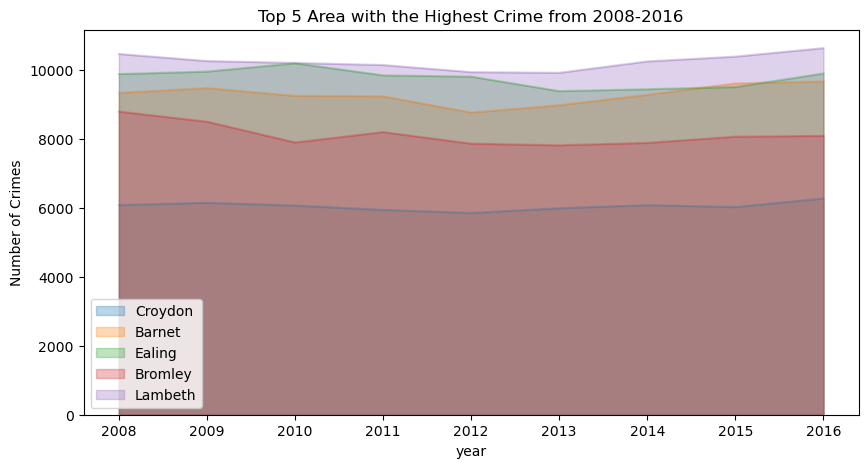

In [36]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             alpha=0.3,
             stacked=False,
             figsize=(10, 5),
             )

plt.title('Top 5 Area with the Highest Crime from 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('year')

plt.show()

**Keterangan**


Dari grafik **Area** di atas didapatkan informasi 5 wilayah(borough) dengan tingkat kejahatan tertinggi dari rentan waktu 2008-20016, dimana posisi pertama yaitu pada wilayah Croydon dan posisi ke-5 adalah Lambeth.

### Histogram

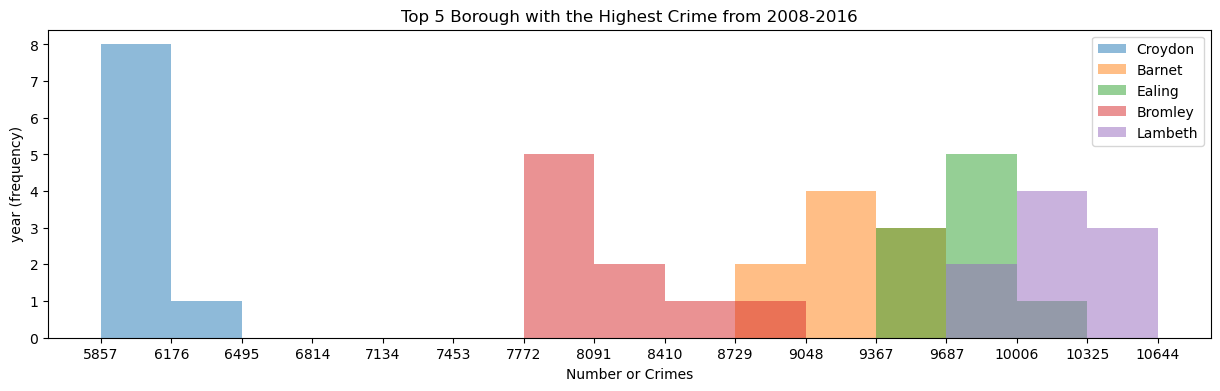

In [37]:
count, bin_edges = np.histogram(df_top5, 15)
df_top5.plot(kind ='hist',
figsize=(15, 4),
bins=15,
alpha=0.5,
xticks=bin_edges,
)
plt.title('Top 5 Borough with the Highest Crime from 2008-2016') 
plt.ylabel('year (frequency)') 
plt.xlabel('Number or Crimes')

plt.show()

**Keterangan**

Dari grafik **Histogram** di atas didapatkan informasi 5 wilayah(borough) dengan frekuensi kejahatan tertinggi dari rentan waktu 2008-20016, dimana fekuensi yang paling tinggi terjadi di wilayah Croydon.

In [38]:
df_5_borough = df[
    (df['borough']== df_top5.columns[0]) |
    (df['borough']== df_top5.columns[1]) |
    (df['borough']== df_top5.columns[2]) |
    (df['borough']== df_top5.columns[3]) |
    (df['borough']== df_top5.columns[4])
]
df_5_borough['borough'].value_counts()

Croydon    94786
Lambeth    92277
Ealing     87985
Barnet     83693
Bromley    73163
Name: borough, dtype: int64

In [39]:
df_5_borough['borough'].value_counts()

Croydon    94786
Lambeth    92277
Ealing     87985
Barnet     83693
Bromley    73163
Name: borough, dtype: int64

In [40]:
df_5_borough['borough'].count()

431904

In [41]:
df_5_borough['borough'].value_counts().index

Index(['Croydon', 'Lambeth', 'Ealing', 'Barnet', 'Bromley'], dtype='object')

### Pie Chart

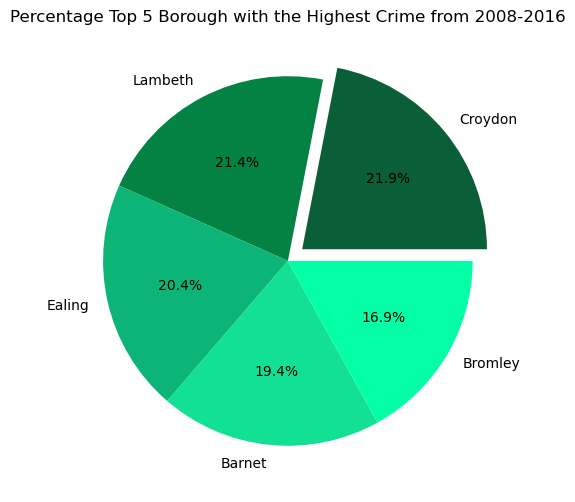

In [42]:
plt.figure(figsize=(6,6))
color = ['#0a5f38', '#048243', '#0cb577', '#12e193', '#05ffa6']
exp = [0.1,0,0,0,0]
plt.pie(df_5_borough['borough'].value_counts(), labels = df_5_borough['borough'].value_counts().index, explode=exp, colors=color, autopct='%1.1f%%');
plt.title('Percentage Top 5 Borough with the Highest Crime from 2008-2016')

plt.show()

**Keterangan**

Dari grafik **Pie** di atas didapatkan informasi persentase dari ke-5 wilayah(borough) dengan tingkat kejahatan tertinggi dari rentan waktu 2008-20016, dimana persentase tertinggi yaitu pada wilayah Croydon sebanyak 21,9%.

In [43]:
df['borough'].value_counts()

Croydon                   94786
Lambeth                   92277
Ealing                    87985
Southwark                 85661
Barnet                    83693
Newham                    82695
Lewisham                  81911
Brent                     80637
Enfield                   77162
Wandsworth                77134
Bromley                   73163
Waltham Forest            71396
Tower Hamlets             71257
Hackney                   71207
Haringey                  70662
Hillingdon                68604
Redbridge                 67682
Greenwich                 66340
Hounslow                  66061
Islington                 65069
Camden                    63721
Westminster               57206
Hammersmith and Fulham    55175
Havering                  55102
Barking and Dagenham      54501
Bexley                    51715
Harrow                    50786
Merton                    50453
Kensington and Chelsea    47735
Sutton                    43870
Richmond upon Thames      42952
Kingston

In [44]:
df.loc[df["borough"] == "Croydon", "value"].max()

1

In [45]:
df[df['major_category']=='Burglary'].groupby(["major_category", 'year'])['value'].sum()

major_category  year
Burglary        2008    29367
                2009    29193
                2010    29471
                2011    29513
                2012    30222
                2013    30037
                2014    29071
                2015    28299
                2016    27862
Name: value, dtype: int64

In [46]:
maj_cat = df[df['major_category']=='Burglary'].groupby(["major_category", 'year'])['value'].sum()
maj_cat

major_category  year
Burglary        2008    29367
                2009    29193
                2010    29471
                2011    29513
                2012    30222
                2013    30037
                2014    29071
                2015    28299
                2016    27862
Name: value, dtype: int64

In [47]:
df_maj_cat = maj_cat.to_frame()
df_maj_cat

value
major_category year       
Burglary       2008  29367
               2009  29193
               2010  29471
               2011  29513
               2012  30222
               2013  30037
               2014  29071
               2015  28299
               2016  27862

## Rata-rata jenis kejahatan utama(major) yang terjadi periode 2008-2016

In [48]:
s_avg_crime = df.groupby('major_category')['value'].sum()/len(df['year'].unique())
s_avg_crime

major_category
Burglary                       29226.111111
Criminal Damage                39307.666667
Drugs                          15430.888889
Fraud or Forgery                 203.888889
Other Notifiable Offences       7325.000000
Robbery                        12309.444444
Sexual Offences                  106.333333
Theft and Handling             73597.666667
Violence Against the Person    60469.555556
Name: value, dtype: float64

In [49]:
df_avg_crime= s_avg_crime.to_frame().sort_values('value',ascending=False)
df_avg_crime

,value
major_category,
Theft and Handling,73597.666667
Violence Against the Person,60469.555556
Criminal Damage,39307.666667
Burglary,29226.111111
Drugs,15430.888889
Robbery,12309.444444
Other Notifiable Offences,7325.000000
Fraud or Forgery,203.888889
Sexual Offences,106.333333


### Bar Chart

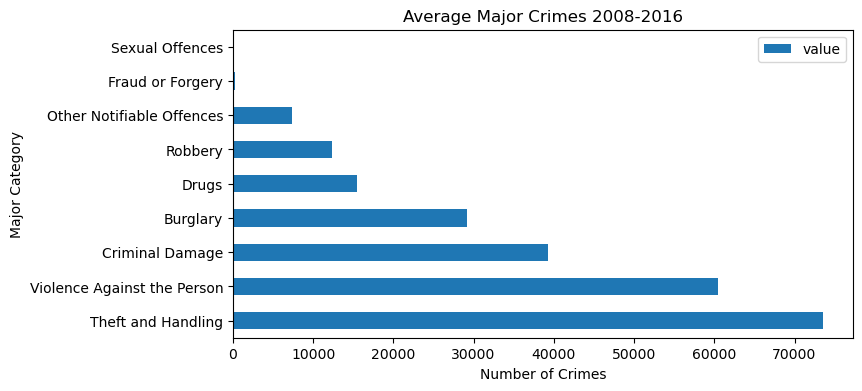

In [50]:
df_avg_crime.plot(kind='barh',
                 figsize = ((8,4))) 
#jenis dari bar 
plt.title('Average Major Crimes 2008-2016') 
#judul 
plt.xlabel('Number of Crimes') 
#ylabel 
plt.ylabel('Major Category') 
#xlabel 
plt.show() #tampilkan

**Keterangan**

Dari grafik **Bar** di atas didapatkan informasi Rata-rata jenis kejahatan yang terjadi dalam kurun tahun 2008-2016. Dimana rata-rata tertinggi adalah kejahatan Theft and Handling dan yang terendah adalah Sexual Offences.

In [51]:
df_2016 = df[df['year']==2016]
df_2016

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
260,E01001902,Hammersmith and Fulham,Drugs,Possession Of Drugs,1,2016,2
345,E01002365,Havering,Violence Against the Person,Harassment,1,2016,8
...,...,...,...,...,...,...,...
13490232,E01003372,Merton,Violence Against the Person,Common Assault,1,2016,5
13490303,E01003014,Lambeth,Violence Against the Person,Other violence,1,2016,5
13490358,E01000084,Barking and Dagenham,Drugs,Possession Of Drugs,1,2016,4
13490379,E01004532,Wandsworth,Violence Against the Person,Common Assault,1,2016,4


In [52]:
major = df.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
major

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,29367,44774,15568,1835,6452,13099,957,72182,56732
2009,29193,43518,15686,0,6587,12889,0,72672,57552
2010,29471,41800,15863,0,6813,13241,0,72437,55888
2011,29513,40220,16121,0,6476,13584,0,74065,54768
2012,30222,37425,15845,0,6910,13515,0,74317,56480
2013,30037,34805,15980,0,6882,12524,0,72411,60081
2014,29071,36118,15286,0,7961,10725,0,73009,65345
2015,28299,37394,14432,0,8493,10553,0,74252,67924
2016,27862,37715,14097,0,9351,10655,0,77034,69456


### Box Plot

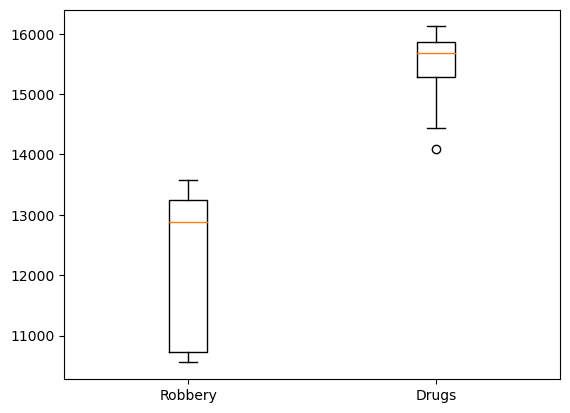

In [53]:
robbery = major['Robbery']
drugs = major['Drugs']
label = ['Robbery', 'Drugs']

plt.boxplot([robbery,drugs], labels=label)
plt.show()

**Keterangan**

Dari grafik **Box** di atas didapatkan informasi nilai maximum, minimum, median, kuartil pertama, dan kuartil ketiga dari perbandingan antara Robbery dan Drugs di London Tahun 2008 - 2016.

In [54]:
dfscat = major[['Robbery','Drugs']]
dfscat = dfscat.reset_index()
dfscat

major_category,year,Robbery,Drugs
0,2008,13099,15568
1,2009,12889,15686
2,2010,13241,15863
3,2011,13584,16121
4,2012,13515,15845
5,2013,12524,15980
6,2014,10725,15286
7,2015,10553,14432
8,2016,10655,14097


### Scatter Plot

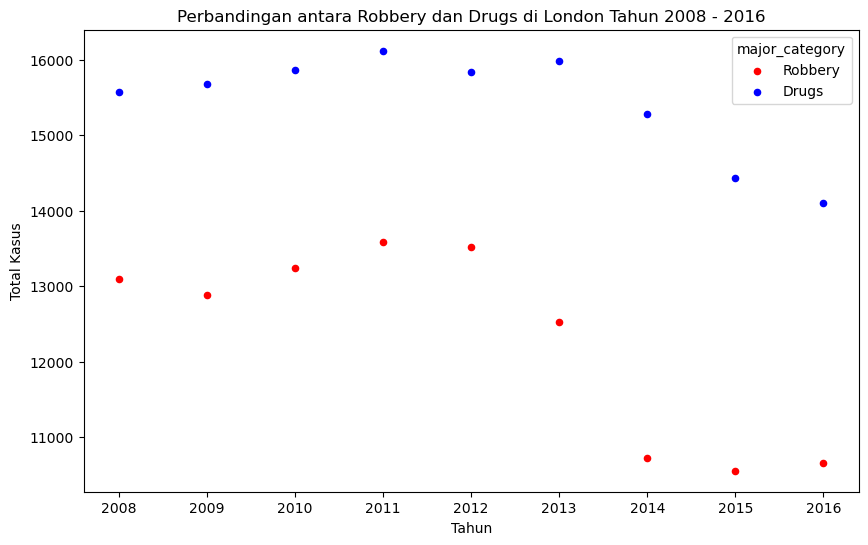

In [55]:
ax1 = dfscat.plot(kind='scatter', x='year', y='Robbery', figsize=(10, 6), color='red', label='Robbery')
ax2 = dfscat.plot(kind='scatter', x='year', y='Drugs', figsize=(10, 6), color='blue',label='Drugs', ax=ax1 )

plt.title('Perbandingan antara Robbery dan Drugs di London Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

**Keterangan**

Dari grafik **Scatter** di atas didapatkan informasi tingkat kejahatan dari perbandingan antara Robbery dan Drugs di London setiap tahun pada tahun 2008 - 2016.

## Wordcloud

In [56]:
stopwords=set(STOPWORDS)

In [57]:
databorough = ' '.join(df['major_category'])

In [58]:
major_wc = WordCloud(
background_color='white',
max_words=100,
stopwords=stopwords
)

# generate the word cloud
major_wc.generate(databorough)

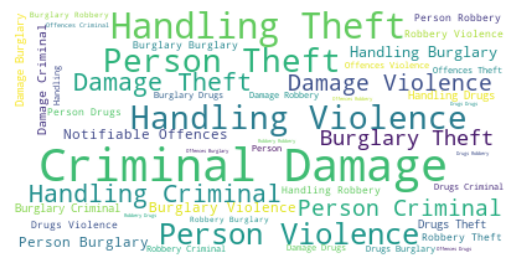

In [59]:
plt.imshow(major_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium Map

In [60]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [61]:
# London Latitude and longitude values
latitude = 51.509865
longitude = -0.118092

In [62]:
# create map and display it
london_map = folium.Map(location=[latitude, longitude], zoom_start = 14)

# display the map of San Francisco
london_map